In [183]:
import sqlite3 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import requests
import numpy as np
from datetime import date, datetime
import time
import pymongo


In [2]:
#connect to the database and create a cursor
con = sqlite3.connect('database.sqlite')
cur = con.cursor()

In [215]:
#fecth all the table names
query = """SELECT name FROM sqlite_master
         WHERE type='table'
         ORDER BY name"""

cur.execute(query).fetchall()

[('Matches',),
 ('Teams',),
 ('Teams_in_Matches',),
 ('Unique_Teams',),
 ('sqlite_sequence',)]

In [7]:
columns_matches = pd.DataFrame(con.execute('select * from Unique_Teams').fetchall())


In [8]:
columns_matches = con.execute('select * from sqlite_sequence')
df1 = pd.DataFrame(columns_matches)

df1

,0,1
0,Matches,46774
1,Unique_Teams,128


In [9]:
matches = cur.execute("""select *
            from Matches 
            where Season = 2011
            AND ((Div = 'D1' OR Div='D2'))""").fetchall()

df_matches = pd.DataFrame(matches)
df_matches. columns = [i[0] for i in cur.description]


dates = df_matches['Date'].unique()

In [10]:
df_matches['Date'].unique()

array(['2012-03-31', '2011-12-11', '2011-08-13', '2011-11-27',
       '2012-02-18', '2012-01-20', '2012-02-04', '2012-04-21',
       '2011-09-18', '2011-10-23', '2011-10-01', '2012-03-03',
       '2011-08-27', '2012-03-17', '2011-11-06', '2012-05-05',
       '2012-04-11', '2011-12-17', '2012-02-03', '2011-10-29',
       '2012-01-22', '2011-12-03', '2012-04-14', '2012-03-25',
       '2012-03-10', '2012-04-07', '2011-11-19', '2011-10-14',
       '2011-09-24', '2012-04-28', '2011-12-18', '2012-03-02',
       '2012-03-16', '2012-02-17', '2011-08-06', '2011-11-04',
       '2011-09-16', '2011-07-15', '2012-05-06', '2012-02-11',
       '2011-10-02', '2012-03-30', '2011-10-22', '2011-08-26',
       '2011-08-07', '2012-02-24', '2011-07-17', '2012-02-12',
       '2011-08-22', '2011-09-09', '2012-04-01', '2011-09-25',
       '2012-04-20', '2011-11-25', '2012-03-09', '2011-11-07',
       '2011-09-10', '2011-08-21', '2011-09-26', '2012-03-26',
       '2011-10-30', '2012-02-13', '2012-02-26', '2011-

## 1. The name of the team

In [11]:
team_names = cur.execute(""" SELECT *
                FROM Unique_Teams
                """).fetchall()


In [12]:
team_names = pd.DataFrame(team_names)
team_names. columns = [i[0] for i in cur.description]


## 2. The total number of goals scored by the team during the 2011 season

In [13]:
home = cur.execute("""SELECT HomeTeam as team, sum(FTHG) as home
                FROM Matches
                WHERE Season = 2011
                AND ((Div = 'D1' OR Div='D2'))
                GROUP BY HomeTeam""").fetchall()


home_df = pd.DataFrame(home)
home_df.columns = [i[0] for i in cur.description]

away = cur.execute("""SELECT AwayTeam as team, sum(FTAG) as away 
                FROM Matches
                WHERE Season =2011
                AND ((Div = 'D1' OR Div='D2'))
                GROUP BY AwayTeam""").fetchall()
away_df = pd.DataFrame(away)
away_df.columns = [i[0] for i in cur.description]


In [14]:
# home_df.head()
away_df.head()

,team,away
0,Aachen,15
1,Augsburg,16
2,Bayern Munich,28
3,Bochum,18
4,Braunschweig,16


In [15]:
goals_df= pd.merge(away_df, home_df, on='team')

goals_df['total_goals'] = goals_df['home']+ goals_df['away']

goals_df.head()

,team,away,home,total_goals
0,Aachen,15,15,30
1,Augsburg,16,20,36
2,Bayern Munich,28,49,77
3,Bochum,18,23,41
4,Braunschweig,16,21,37


## 3. The total number of wins the team earned during the 2011 season

In [16]:
homewin = cur.execute("""SELECT HomeTeam as team, count(FTR) as homewin
                FROM Matches
                WHERE Season = 2011
                AND FTR='H'
                AND ((Div = 'D1' OR Div='D2'))
                GROUP BY HomeTeam""").fetchall()


homewin_df = pd.DataFrame(homewin)
homewin_df.columns = [i[0] for i in cur.description]


homewin_df.head()

,team,homewin
0,Aachen,4
1,Augsburg,6
2,Bayern Munich,14
3,Bochum,7
4,Braunschweig,6


In [17]:
homeloss = cur.execute("""SELECT HomeTeam as team, count(FTR) as homeloss 
                FROM Matches
                WHERE Season = 2011
                AND FTR='A'
                AND ((Div = 'D1' OR Div='D2'))
                GROUP BY HomeTeam""").fetchall()


homeloss_df = pd.DataFrame(homeloss)
homeloss_df.columns = [i[0] for i in cur.description]


homeloss_df.head()

,team,homeloss
0,Aachen,7
1,Augsburg,4
2,Bayern Munich,2
3,Bochum,7
4,Braunschweig,3


In [18]:
awaywin = cur.execute("""SELECT AwayTeam as team, count(FTR) as awaywin
                FROM Matches
                WHERE Season =2011
                AND FTR='A'
                AND NOT Div='E0'
                GROUP BY AwayTeam""").fetchall()

awaywin_df = pd.DataFrame(awaywin)
awaywin_df.columns = [i[0] for i in cur.description]

awaywin_df.head()

,team,awaywin
0,Aachen,2
1,Augsburg,2
2,Bayern Munich,9
3,Bochum,3
4,Braunschweig,4


In [19]:
awayloss = cur.execute("""SELECT AwayTeam as team, count(FTR) as awayloss
                FROM Matches
                WHERE Season =2011
                AND FTR='H'
                AND ((Div = 'D1' OR Div='D2'))
                GROUP BY AwayTeam""").fetchall()

awayloss_df = pd.DataFrame(awayloss)
awayloss_df.columns = [i[0] for i in cur.description]

awayloss_df.head()

,team,awayloss
0,Aachen,8
1,Augsburg,8
2,Bayern Munich,5
3,Bochum,10
4,Braunschweig,6


In [20]:
wins_df= pd.merge(awaywin_df, homewin_df, on='team')

wins_df['totalwin'] = wins_df['homewin']+ wins_df['awaywin']
wins_df.head()


,team,awaywin,homewin,totalwin
0,Aachen,2,4,6
1,Augsburg,2,6,8
2,Bayern Munich,9,14,23
3,Bochum,3,7,10
4,Braunschweig,4,6,10


In [21]:
loss_df= pd.merge(awayloss_df, homeloss_df, on='team')

loss_df['totaloss'] = loss_df['homeloss']+ loss_df['awayloss']

loss_df.head()

,team,awayloss,homeloss,totaloss
0,Aachen,8,7,15
1,Augsburg,8,4,12
2,Bayern Munich,5,2,7
3,Bochum,10,7,17
4,Braunschweig,6,3,9


In [22]:
totalwinloss = pd.merge(wins_df, loss_df, on='team', how='left')

In [23]:
totalwinloss.head()

,team,awaywin,homewin,totalwin,awayloss,homeloss,totaloss
0,Aachen,2,4,6,8.0,7.0,15.0
1,Augsburg,2,6,8,8.0,4.0,12.0
2,Bayern Munich,9,14,23,5.0,2.0,7.0
3,Bochum,3,7,10,10.0,7.0,17.0
4,Braunschweig,4,6,10,6.0,3.0,9.0


## 4. A histogram visualization of the team's wins and losses for the 2011 season (store the visualization directly)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11dca2240>,
      dtype=object)

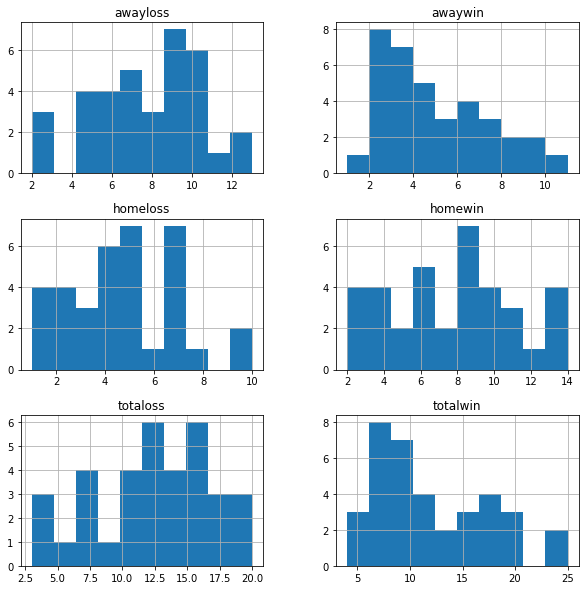

In [24]:
totalwinloss.hist(figsize=(10,10))

### API: Weather Data

In [25]:
!pip install python-dotenv

In [26]:
# lat 52.5200, long 13.4050 for Berling
# [YYYY]-[MM]-[DD]T[HH]:[MM]:[SS][timezone]. timezone

%load_ext autoreload
%autoreload 2

from dotenv import load_dotenv
import os

load_dotenv()

class WeatherGetter():

    def __init__(self):
        # Let's set our secrets and keys from the .env file
        # as environment variables.
        self.BASE_URL = 'https://api.darksky.net'
        self.token = os.getenv('DARKSKY_KEY')

        if len(self.token) == 0:
            raise ValueError('Missing API key!')
    
    def getForecast(self, lat, long, time):
        url = 'https://api.darksky.net/forecast/{}/{},{},{}?exclude=currently,alerts,flags,minutely'.format(self.token,lat,long,time)
        data = requests.get(url)
        return data.json()



call = WeatherGetter()
                           
# darkweather.getForecast(52.5200,13.4050,1323626400)


In [64]:
# dates_weather = df_matches['Date'].unique()

unique = df_matches['Date'].unique()

dates_list = []

for datetime in unique:
    dates_list.append(datetime + "T20:00:00")

In [65]:
len(dates_list)

136

In [29]:
# lat = 52.5200
# long = 13.4050
# weather_json=[]

# for date in mydates:
#     weather = call.getForecast(lat,long,date)
#     weather_json.append(weather)


In [30]:
weather = requests.get(f'https://api.darksky.net/forecast/40d2e11e7eb4415b0687a0269c1f5f94/52.5200, 13.4050, 2012-01-31T20:00:00').json()

In [31]:
# weather_dates_2={}

# for date in dates_list:
#     weather = requests.get(f'https://api.darksky.net/forecast/40d2e11e7eb4415b0687a0269c1f5f94/52.5200, 13.4050, {date}').json()
#     weather_like = weather
#     try:
#         weather_dates_2.append(weather['daily']['data'][0]['icon'])
#     except:                           
#         weather_dates_2.append(weather['daily']['data'][0]['summary'])
# weather_dates_2

In [68]:


weather_dates={}

for date in dates_list:
    weather = requests.get(f'https://api.darksky.net/forecast/fc74c45a88d083f3e27fd9842bdbea64/52.5200, 13.4050, {date}').json()
    weather_like = weather['currently']['summary']
    weather_dates[date] = weather_like
    
weather_dates


{'2012-03-31T20:00:00': 'Mostly Cloudy',
 '2011-12-11T20:00:00': 'Clear',
 '2011-08-13T20:00:00': 'Clear',
 '2011-11-27T20:00:00': 'Partly Cloudy',
 '2012-02-18T20:00:00': 'Mostly Cloudy',
 '2012-01-20T20:00:00': 'Mostly Cloudy',
 '2012-02-04T20:00:00': 'Clear',
 '2012-04-21T20:00:00': 'Clear',
 '2011-09-18T20:00:00': 'Possible Light Rain',
 '2011-10-23T20:00:00': 'Clear',
 '2011-10-01T20:00:00': 'Clear',
 '2012-03-03T20:00:00': 'Clear',
 '2011-08-27T20:00:00': 'Possible Light Rain',
 '2012-03-17T20:00:00': 'Clear',
 '2011-11-06T20:00:00': 'Clear',
 '2012-05-05T20:00:00': 'Mostly Cloudy',
 '2012-04-11T20:00:00': 'Mostly Cloudy',
 '2011-12-17T20:00:00': 'Mostly Cloudy',
 '2012-02-03T20:00:00': 'Partly Cloudy',
 '2011-10-29T20:00:00': 'Clear',
 '2012-01-22T20:00:00': 'Possible Drizzle',
 '2011-12-03T20:00:00': 'Possible Drizzle',
 '2012-04-14T20:00:00': 'Clear',
 '2012-03-25T20:00:00': 'Clear',
 '2012-03-10T20:00:00': 'Mostly Cloudy',
 '2012-04-07T20:00:00': 'Mostly Cloudy',
 '2011-11-19

In [69]:
weather_df = pd.DataFrame(list(weather_dates.items()), columns=['date', 'DateValue'])

In [213]:
weather_df.head()

weather_df.shape

(136, 2)

In [66]:
df_matches['date']= df_matches['Date'].map(lambda x: x + "T20:00:00")

In [67]:
df_matches.shape

(612, 10)

In [71]:
matches_weather_df = pd.merge(df_matches, weather_df, on='date')

In [72]:
matches_weather_df['DateValue'].unique()

array(['Mostly Cloudy', 'Clear', 'Partly Cloudy', 'Possible Light Rain',
       'Possible Drizzle', 'Overcast', 'Light Rain', 'Foggy', 'Rain'],
      dtype=object)

In [109]:
matches_weather_df['rain'] = matches_weather_df['DateValue'].apply(lambda x: 1 if x=='Rain' else (1 if x=='Light Rain' else 0) )


In [130]:
matches_weather_df['rain_home_win'] =np.where(np.logical_and(matches_weather_df['FTR']=='H',matches_weather_df['rain']==1),1,0)

In [131]:
matches_weather_df['rain_away_win'] =np.where(np.logical_and(matches_weather_df['FTR']=='H',matches_weather_df['rain']==1),1,0)

In [167]:
hometeam = matches_weather_df.groupby(['HomeTeam']).sum()

hometeam['Team']= hometeam.index

home = hometeam.loc[:,['Team','rain_home_win', 'rain']]

In [168]:
awayteam = matches_weather_df.groupby(['AwayTeam']).sum()
awayteam['Team']= hometeam.index
away = awayteam.loc[:,['Team', 'rain_away_win','rain']]

In [169]:
rain_wins = pd.merge(away, home, on ='Team')

In [170]:
rain_wins.head()

,Team,rain_away_win,rain_x,rain_home_win,rain_y
0,Aachen,0,0,0,0
1,Augsburg,0,0,0,0
2,Bayern Munich,0,0,1,1
3,Bochum,0,0,1,2
4,Braunschweig,0,1,0,0


In [173]:
rain_wins.groupby('Team').sum()

rain_wins['total']=rain_wins['rain_home_win']+rain_wins['rain_away_win']

rain_wins['total_rain'] = rain_wins['rain_x']+rain_wins['rain_y']

In [175]:
per_win = rain_wins.groupby('Team').sum()

per_win['percentage'] = per_win['total']/per_win['total_rain']

In [180]:
per_win['team'] = per_win.index

In [181]:
mongodata = pd.merge(totalwinloss,per_win, on='team')

In [184]:
mymongo = pymongo.MongoClient("mongodb://127.0.0.1:27017/")

In [186]:
mymongo

MongoClient(host=['127.0.0.1:27017'], document_class=dict, tz_aware=False, connect=True)

In [188]:
mydb = mymongo['teams_data']

In [189]:
mycollection = mydb['myteams']

In [210]:
mydict = list(mongodata.to_dict(orient='records'))


In [212]:
mycollection.insert_many(mydict)